In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr

In [18]:
cash_request_df = pd.read_csv("./project_dataset/extract - cash request - data analyst.csv")
fees_df = pd.read_csv("./project_dataset/extract - fees - data analyst - .csv")



In [19]:
print(cash_request_df.head())

     id  amount    status                     created_at  \
0     5   100.0  rejected  2019-12-10 19:05:21.596873+00   
1    70   100.0  rejected   2019-12-10 19:50:12.34778+00   
2     7   100.0  rejected   2019-12-10 19:13:35.82546+00   
3    10    99.0  rejected  2019-12-10 19:16:10.880172+00   
4  1594   100.0  rejected  2020-05-06 09:59:38.877376+00   

                      updated_at  user_id                   moderated_at  \
0   2019-12-11 16:47:42.40783+00    804.0  2019-12-11 16:47:42.405646+00   
1  2019-12-11 14:24:22.900054+00    231.0  2019-12-11 14:24:22.897988+00   
2  2019-12-11 09:46:59.779773+00    191.0  2019-12-11 09:46:59.777728+00   
3  2019-12-18 14:26:18.136163+00    761.0  2019-12-18 14:26:18.128407+00   
4   2020-05-07 09:21:55.34008+00   7686.0  2020-05-07 09:21:55.320193+00   

   deleted_account_id             reimbursement_date  \
0                 NaN  2020-01-09 19:05:21.596363+00   
1                 NaN   2020-01-09 19:50:12.34778+00   
2             

In [20]:
print(df_fees.shape)
print(cash_request_df.shape)

(21061, 13)
(23970, 16)


In [26]:

cash_request_df['user_id'] = cash_request_df['user_id'].fillna(cash_request_df['deleted_account_id'])

# Convert the 'created_at' column to datetime format for cohort analysis
cash_request_df['created_at'] = pd.to_datetime(cash_request_df['created_at'])

# Create a 'cohort_month' column to track the first cash request month for each user
cash_request_df['cohort_month'] = cash_request_df.groupby('user_id')['created_at'].transform('min').dt.to_period('M')

# Create a 'request_month' column to track the month of each request
cash_request_df['request_month'] = cash_request_df['created_at'].dt.to_period('M')

# Count the number of requests made by each cohort per request month
cohort_data = cash_request_df.groupby(['cohort_month', 'request_month']).size().unstack(fill_value=0)

# Display the cohort data
print(cohort_data.head())


request_month  2019-11  2019-12  2020-01  2020-02  2020-03  2020-04  2020-05  \
cohort_month                                                                   
2019-11              1        1        0        0        0        1        1   
2019-12              0      288      106       63       79       82       86   
2020-01              0        0      117       24       17       35       31   
2020-02              0        0        0       97       49       49       45   
2020-03              0        0        0        0       99       42       46   

request_month  2020-06  2020-07  2020-08  2020-09  2020-10  2020-11  
cohort_month                                                         
2019-11              0        0        1        1        2        0  
2019-12             91       72       84       53       75        1  
2020-01             29       31       22       22       25        1  
2020-02             45       45       44       27       40        0  
2020-03            

C:\Users\Khaled\AppData\Local\Temp\ipykernel_1400\3043585352.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_request_df['cohort_month'] = cash_request_df.groupby('user_id')['created_at'].transform('min').dt.to_period('M')
C:\Users\Khaled\AppData\Local\Temp\ipykernel_1400\3043585352.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_request_df['request_month'] = cash_request_df['created_at'].dt.to_period('M')


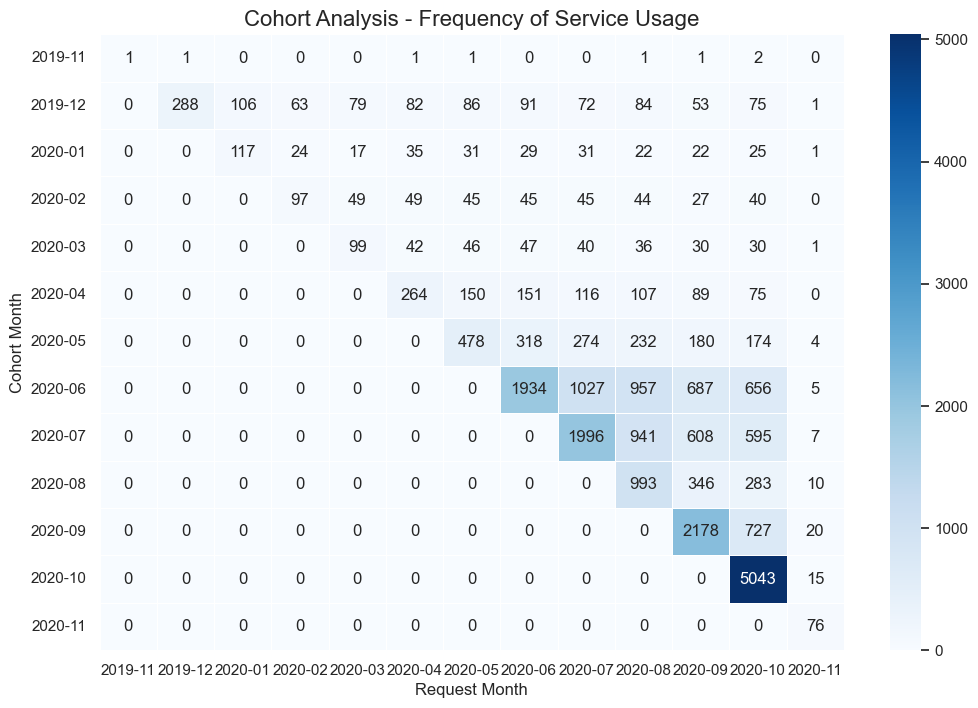

In [27]:
# Create a new heatmap, but with a more readable scale and labels
plt.figure(figsize=(12, 8))

# Plot the normalized cohort data as a heatmap with annotations
sns.heatmap(cohort_data, cmap='Blues', annot=True, fmt='d', cbar=True, linewidths=0.5)

# Add labels and a clearer title
plt.title('Cohort Analysis - Frequency of Service Usage', fontsize=16)
plt.xlabel('Request Month')
plt.ylabel('Cohort Month')

# Show the plot
plt.show()


In [34]:
# Step 1: Merge the cash request dataset with the fees dataset using cash_request_id
merged_df = pd.merge(cash_request_df, fees_df, left_on='id', right_on='cash_request_id', how='left')

# Step 2: Filter for rows where the 'type' in the fees dataset is 'incident'
incident_df = merged_df[merged_df['type'] == 'incident']

# Step 3: Count the total number of requests and incidents for each cohort
total_requests_per_cohort = cash_request_df.groupby('cohort_month')['id'].count()
total_incidents_per_cohort = incident_df.groupby('cohort_month')['id_x'].count()

# Step 4: Calculate the incident rate for each cohort
incident_rate_per_cohort = (total_incidents_per_cohort / total_requests_per_cohort * 100).fillna(0)

# Display the incident rate for each cohort
incident_rate_per_cohort


cohort_month
2019-11     0.000000
2019-12     4.907407
2020-01     4.237288
2020-02     5.442177
2020-03     8.625337
2020-04    12.500000
2020-05    14.096386
2020-06    14.736043
2020-07    13.889559
2020-08     9.129902
2020-09     6.666667
2020-10     0.454725
2020-11     0.000000
Freq: M, dtype: float64

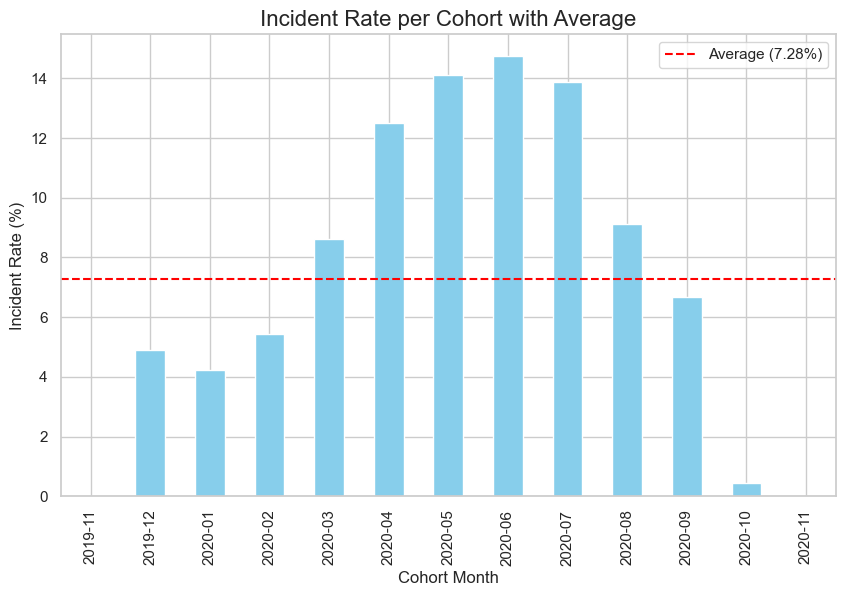

In [35]:
# Step 1: Merge the cash request dataset with the fees dataset
merged_df = pd.merge(cash_request_df, fees_df, left_on='id', right_on='cash_request_id', how='left')

# Step 2: Filter for payment incidents (adjust 'incident' to match your actual type if needed)
incident_df = merged_df[merged_df['type'] == 'incident']

# Step 3: Calculate the number of requests and incidents per cohort
total_requests_per_cohort = cash_request_df.groupby('cohort_month')['id'].count()
total_incidents_per_cohort = incident_df.groupby('cohort_month')['id_x'].count()

# Step 4: Calculate the incident rate (incidents / total requests), then convert to percentage
incident_rate_per_cohort = (total_incidents_per_cohort / total_requests_per_cohort * 100).fillna(0)

# Step 5: Calculate the average incident rate across all cohorts
average_incident_rate = incident_rate_per_cohort.mean()

# Step 6: Plot the incident rate
plt.figure(figsize=(10, 6))
incident_rate_per_cohort.plot(kind='bar', color='skyblue')

# Step 7: Add an average line
plt.axhline(y=average_incident_rate, color='red', linestyle='--', label=f'Average ({average_incident_rate:.2f}%)')

# Add labels and title
plt.title('Incident Rate per Cohort with Average', fontsize=16)
plt.xlabel('Cohort Month', fontsize=12)
plt.ylabel('Incident Rate (%)', fontsize=12)

# Show legend
plt.legend()

# Show the plot
plt.show()


C:\Users\Khaled\AppData\Local\Temp\ipykernel_1400\3167193279.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  accepted_fees_df['request_month'] = accepted_fees_df['created_at_x'].dt.to_period('M')
C:\Users\Khaled\AppData\Local\Temp\ipykernel_1400\3167193279.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted_fees_df['request_month'] = accepted_fees_df['created_at_x'].dt.to_period('M')


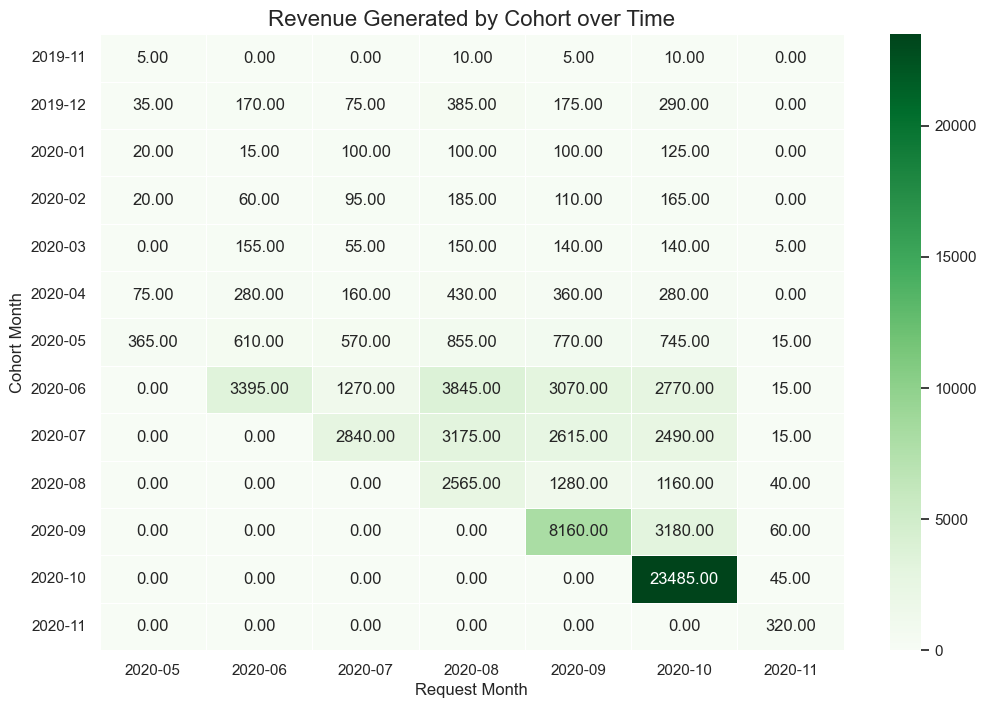

In [36]:
# Step 2: Filter for 'accepted' fees to reflect actual revenue
accepted_fees_df = merged_df[merged_df['status_y'] == 'accepted']

# Step 3: Group by cohort month and request month to sum up the total revenue per cohort over time
accepted_fees_df['request_month'] = accepted_fees_df['created_at_x'].dt.to_period('M')
revenue_per_cohort = accepted_fees_df.groupby(['cohort_month', 'request_month'])['total_amount'].sum().unstack(fill_value=0)

# Step 4: Plot the revenue generated by each cohort over time as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(revenue_per_cohort, cmap='Greens', annot=True, fmt='.2f', cbar=True, linewidths=0.5)

# Add labels and title
plt.title('Revenue Generated by Cohort over Time', fontsize=16)
plt.xlabel('Request Month')
plt.ylabel('Cohort Month')

# Show the plot
plt.show()


C:\Users\Khaled\AppData\Local\Temp\ipykernel_1400\138168650.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  accepted_fees_df['request_month'] = accepted_fees_df['created_at_x'].dt.to_period('M')
C:\Users\Khaled\AppData\Local\Temp\ipykernel_1400\138168650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted_fees_df['request_month'] = accepted_fees_df['created_at_x'].dt.to_period('M')


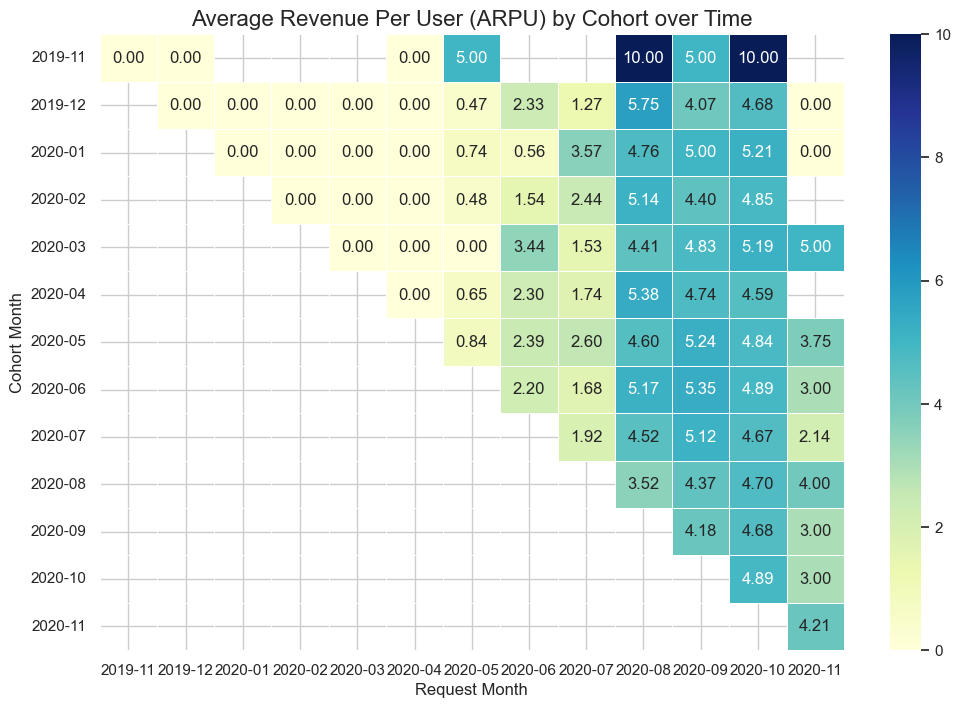

In [37]:
#ARPU Calculation: The ARPU is calculated by dividing total revenue by the number of unique users.


# Step 3: Group by cohort month and request month to sum up the total revenue per cohort over time
accepted_fees_df['request_month'] = accepted_fees_df['created_at_x'].dt.to_period('M')
revenue_per_cohort = accepted_fees_df.groupby(['cohort_month', 'request_month'])['total_amount'].sum().unstack(fill_value=0)

# Step 4: Count unique users per cohort and month
unique_users_per_cohort = cash_request_df.groupby(['cohort_month', 'request_month'])['user_id'].nunique().unstack(fill_value=0)

# Step 5: Calculate ARPU (Average Revenue Per User)
arpu_per_cohort = revenue_per_cohort.div(unique_users_per_cohort, fill_value=0)

# Step 6: Plot the ARPU generated by each cohort over time as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(arpu_per_cohort, cmap='YlGnBu', annot=True, fmt='.2f', cbar=True, linewidths=0.5)

# Add labels and title
plt.title('Average Revenue Per User (ARPU) by Cohort over Time', fontsize=16)
plt.xlabel('Request Month')
plt.ylabel('Cohort Month')

# Show the plot
plt.show()